<a href="https://colab.research.google.com/github/nuriaprol/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 6.</font>
##### Laura Lirón Carrión, Alberto Muñoz Gutierrez, Nuria Prol Vecoña.
# <font color='00008B'>PRÁCTICA 3.</font>
#####Aprendizaje automático


---

*El objetivo de esta práctica es trabajar los principios básicos de las Redes de Neuronas Convolucionales.*

---
Crea un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y
clasificar imágenes en 100 categorías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos
al conjunto de datos CIFAR-100 dataset.

---

**1. Definir el problema y montar un conjunto de datos.**
---
Datos de entrada - Imágenes de la base de datos CIFAR100

Predicción - Se busca predecir lo que la imagen muestra

Tipo de problema - Clasificación Multiclase

Hipótesis - Las salidas pueden predecirse con las entradas dadas, y los datos son lo suficientemente informativos.

---
**2. Elegir una medida del éxito**
--


Como indicador de éxito, se persigue la máxima precisión en este problema de clasificación equilibrada, donde cada clase tiene igual probabilidad de ocurrencia. El objetivo es alcanzar la mayor exactitud posible al predecir lo representado en una imagen dada.
Importamos las librerías requeridas para el programa.

---



**TensorFlow y Keras:** Juntos, ofrecen una potente plataforma para el desarrollo y entrenamiento de modelos de aprendizaje automático de manera eficiente.

**Matplotlib y NumPy:** proporcionan herramientas eficaces para la visualización y manipulación eficiente de datos en entornos científicos y de aprendizaje automático.


In [14]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import keras

print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.14.0


Estas importaciones de Keras permiten construir modelos de manera secuencial mediante la conexión de capas, utilizando capas convolucionales, de pooling y completamente conectadas. El optimizador Adam facilita la optimización eficiente durante el entrenamiento de la red neuronal.

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization
from keras.optimizers import Adam

**Keras para Preprocesamiento de Imágenes:** Estas importaciones de Keras incluyen utilidades para convertir etiquetas a formato categórico, herramientas para visualización con Matplotlib y generadores de datos de imágenes para aumentar y manipular conjuntos de datos de entrenamiento de manera eficaz.

In [16]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

**Regulizacion:**
Se importa ahora la regularización L2 en Keras. La regularización L2 es una técnica para prevenir el sobreajuste en modelos de aprendizaje automático al agregar una penalización a los pesos del modelo proporcional a su magnitud cuadrada, ayudando así a mantener los pesos pequeños. Se explicará con más detalle posteiormente,

In [17]:
from keras.regularizers import l2

**CIFAR-100:** Esta importación de Keras proporciona acceso directo al conjunto de datos CIFAR-100, que consta de 60,000 imágenes en color de 100 clases diferentes. Facilita la carga y exploración de este conjunto de datos para tareas de aprendizaje automático.

In [18]:
from keras.datasets import cifar100

**Carga y exploración del conjunto de datos CIFAR-100**

 Al realizar la carga del conjunto de datos, se divide en conjuntos de entrenamiento y prueba. Las dimensiones de las imágenes en el conjunto de entrenamiento son de 50,000, cada una de tamaño 32x32 píxeles y con 3 canales de color (RGB)*.
 En términos de etiquetas, hay 50,000 correspondientes a las imágenes de entrenamiento. Cada una asociada con su imagen. Cuanto más grande sea este conjunto, el modelo puede aprender patrones más complejos y generalizar mejor.

 Para el conjunto de prueba, hay 10,000 imágenes con las mismas características, y se dispone de 10,000 etiquetas correspondientes. Estos detalles son esenciales al diseñar y entrenar modelos de aprendizaje automático en el contexto de CIFAR-100. Este conjunto es independiente del conjunto de entrenamiento.




>  *RGB = RGB es un acrónimo de "Red, Green, Blue" (Rojo, Verde, Azul en español). En el contexto de las imágenes, RGB se refiere a un modelo de color en el que cada píxel de la imagen se representa como una combinación de tres colores primarios: rojo, verde y azul.



In [19]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

print(train_images.shape)
print(train_labels.size)

print(test_images.shape)
print(test_labels.size)

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
10000


**Exploración del conjunto de datos**

CIFAR-100 consta de 20 categorías "gruesas", y cada una de estas categorías tiene asociadas 5 categorías "finas". Este modelo tiene como objetivo clasificar imágenes según sus etiquetas finas, que son más específicas y detalladas en comparación con las etiquetas gruesas. Enfocarse en las etiquetas finas permite una clasificación más específica y precisa del conjunto de datos.



Este código visualiza 5 imágenes aleatorias del conjunto de entrenamiento de CIFAR-100 junto con sus etiquetas finas asociadas. Primero, se define la lista fine_labels que mapea índices a nombres de clases más específicos, después se eligen 5 índices aleatorios y se muestran esas imágenes.

A partir de las imágenes de entrada, el objetivo es clasificarlas en una de las 100 categorías finas disponibles. El modelo se entrena con un conjunto de 50,000 imágenes y se evalúa en un conjunto de prueba de 10,000 imágenes que no ha visto nunca para garantizar predicciones precisas después del entrenamiento.


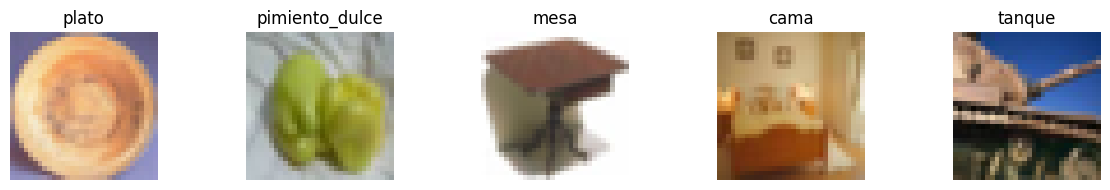

In [20]:
# Clases correspondientes a las etiquetas finas y gruesas de CIFAR-100
fine_labels = [
  'manzana', 'pez_de_acuario', 'bebé', 'oso', 'castor', 'cama', 'abeja', 'escarabajo', 'bicicleta', 'botella',
'tazón', 'niño', 'puente', 'autobús', 'mariposa', 'camello', 'lata', 'castillo', 'oruga', 'ganado',
'silla', 'chimpancé', 'reloj', 'nube', 'cucaracha', 'sofá', 'cangrejo', 'cocodrilo', 'taza',
'dinosaurio', 'delfín', 'elefante', 'pez_plano', 'bosque', 'zorro', 'niña', 'hámster', 'casa',
'canguro', 'teclado', 'lámpara', 'cortacésped', 'leopardo', 'león', 'lagarto', 'langosta', 'hombre',
'árbol_de_arce', 'motocicleta', 'montaña', 'ratón', 'seta', 'roble', 'naranja', 'orquídea',
'nutria', 'palmera', 'pera', 'camioneta', 'pino', 'llanura', 'plato', 'adormidera', 'puercoespín',
'zarigüeya', 'conejo', 'mapache', 'rayo', 'carretera', 'cohete', 'rosa', 'mar', 'foca', 'tiburón', 'musaraña',
'zorrillo', 'rascacielos', 'caracol', 'serpiente', 'araña', 'ardilla', 'tranvía', 'girasol', 'pimiento_dulce',
'mesa', 'tanque', 'teléfono', 'televisión', 'tigre', 'tractor', 'tren', 'trucha', 'tulipán', 'tortuga',
'armario', 'ballena', 'árbol_de_sauce', 'lobo', 'mujer', 'gusano'
]

# Seleccionar 5 imágenes aleatorias del conjunto de entrenamiento
random_indices = np.random.choice(len(train_images), 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(12, 2))

for i, index in enumerate(random_indices):
    image = train_images[index]
    flabel = train_labels[index]
    true_label = fine_labels[flabel[0]]

    axes[i].imshow(image)
    axes[i].set_title(f'{true_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Se repite el código, pero ahora visualizamos el conjunto de pruebas que se utilizará para evaluar el modelo.

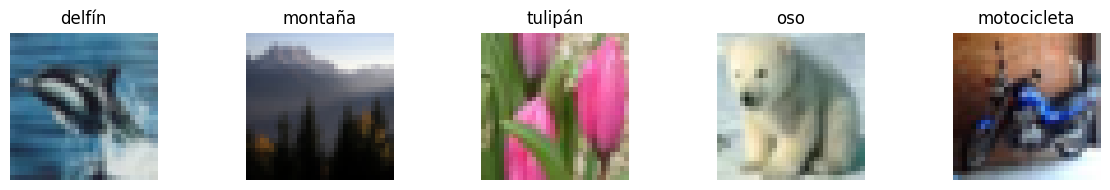

In [21]:
random_indices = np.random.choice(len(test_images), 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(12, 2))

for i, index in enumerate(random_indices):
    image = test_images[index]
    flabel = test_labels[index]
    true_label = fine_labels[flabel[0]]

    axes[i].imshow(image)
    axes[i].set_title(f'{true_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Preparación de datos**

---

Normalización de Imágenes:

train_images y test_images son convertidas a tipo de datos float32.
Se normalizan dividiendo todos los píxeles por 255 (el valor máximo de intensidad en una imagen). Esto escala los valores de los píxeles al rango [0, 1], facilitando el procesamiento para el modelo.

---

Codificación One-Hot de Etiquetas:

to_categorical se utiliza para convertir las etiquetas de clases a un formato de codificación one-hot.
train_labels y test_labels se convierten en un vector binario con un 1 en la posición correspondiente a la clase y 0 en las demás posiciones.


In [22]:
# Normalizar las imágenes y convertir las etiquetas a one-hot encoding
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

**Aleatoriedad:**

 Se introduce ahora la aleatoriedad en los datos de entrenamiento, esto es crucial para evitar sesgos durante el entrenamiento de modelos de aprendizaje automático.

Primero, las imágenes y sus etiquetas se combinan en una lista utilizando la función zip. Este paso asegura que cada imagen se asocie correctamente con su etiqueta correspondiente.

A continuación, la función np.random.shuffle se utiliza para barajar aleatoriamente los datos combinados. Esto es esencial para evitar que el modelo aprenda patrones específicos asociados a la posición o el orden original de los datos.

Posteriormente, se descomprimen los datos barajados.

Se busca variabilidad en el orden para mejorar la generalización del modelo.


In [23]:
# Combinar imágenes y etiquetas para mantener la asociación
combined_data = list(zip(train_images, train_labels))

# Shuffle de los datos combinados
np.random.shuffle(combined_data)

# Descomprimir los datos combinados
shuffled_train_images, shuffled_train_labels = zip(*combined_data)

# Convertir las listas a numpy arrays
train_images = np.array(shuffled_train_images)
train_labels = np.array(shuffled_train_labels)

**3. Decidir un protocolo de evalución**
---

Cómo protocolo de evaluación se utilizará hold out.
Para este protocolo se separa un porcentaje de los datos de entrenamiento para estimar de manera realista cómo se espera que el modelo funcione en situaciones del mundo real con nuevos datos. Además, ayuda a evitar el sobreajuste al conjunto de entrenamiento y garantiza que el modelo tenga una capacidad de generalización adecuada.Este conjunto de validación es esencial para ajustar y optimizar los parámetros del modelo.


---

**Separación de Conjuntos de Entrenamiento y Validación:**

Se establece el tamaño del conjunto de validación (validation_size) en 10,000 imágenes. Este número de asegurar que el conjunto de validación sea lo suficientemente grande como para ser representativo de la distribución general de datos.

train_images_val y train_label_val contienen las primeras 10,000 imágenes y etiquetas, respectivamente, que se utilizarán como conjunto de validación.

partial_train_images_train y partial_train_label_train contienen el resto de las imágenes y etiquetas de entrenamiento, respectivamente.

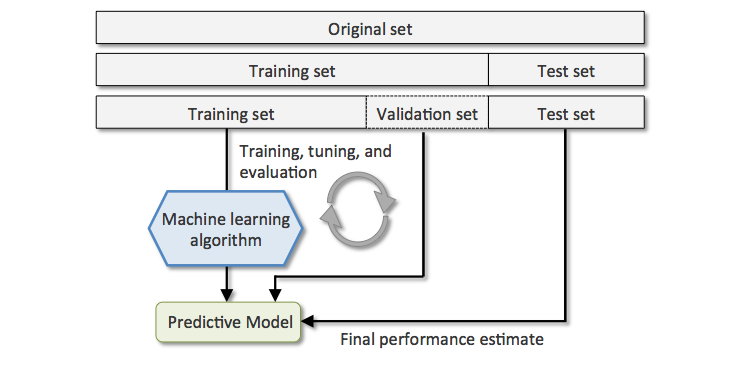


In [24]:
# Separar conjuntos de entrenamiento y validación
validation_size = 10000
train_images_val = train_images[:validation_size]
partial_train_images_train = train_images[validation_size:]

train_label_val = train_labels[:validation_size]
partial_train_label_train = train_labels[validation_size:]

**REDES CONVOLUCIONALES**

Las redes convolucionales, conocidas como **CNN** (Convolutional Neural Networks), son un tipo especializado de redes profundas diseñadas específicamente para tareas como clasificación de imágenes, detección de objetos o segmentación de imágenes. Estas redes se destacan por su capacidad para aprender y reconocer patrones visuales en imágenes de manera efectiva.

En una CNN, el proceso de aprendizaje se organiza en **capas**, en cuanto a las capas convolucionales, las primeras se centran en aprender características simples, mientras que las capas posteriores se especializan en características más complejas. Cada capa convolucional emplea filtros, también llamados **kernels**, que se aplican a la imagen. Cada filtro está diseñado para reconocer una característica específica. La introducción de la función de activación ReLU en estas capas añade no linealidades al modelo, permitiendo así la identificación de patrones más complejos.

En el interior de cada capa convolucional, se selecciona el número de filtros, y cada uno aprende **características distintas**. Estos filtros operan simultáneamente en la imagen, generando un **mapa de características** al desplazarse por la imagen con una ventana deslizante. Cada neurona en el mapa de características se conecta a una región de la imagen, y cada filtro tiene su propio mapa asociado. Esta capa deslizante se desliza según el stride* indicado, si no se especifica nada tomará el valor de 1.

En contraste con las capas densas, las capas convolucionales se especializan en la detección de patrones locales en lugar de patrones globales, lo que las convierte en una elección adecuada para la identificación de características visuales en imágenes. Además, estas capas aprenden jerarquías espaciales para comprender la importancia de la posición de una característica dentro de la imagen, como la ubicación de los ojos en un rostro.

Tras cada capa convolucional, se incluye comúnmente una **capa de pooling**, siendo el max pooling un ejemplo. Esta capa reduce la dimensión espacial de los mapas de características, mejorando la eficiencia y disminuyendo la sensibilidad a variaciones en la posición de las características. La capa de pooling garantiza la invarianza a la traslación y se centra en resaltar lo más relevante de la información visual. Max pooling es computacionalmente menos caro que average pooling y además obtiene mejores resultados.

Finalmente, después de las capas convolucionales y de pooling, se emplea una capa **flatten** para aplanar el mapa de características, seguida de **capas densas** diseñadas para la salida esperada, incluyendo una capa final de clasificación con un número específico de neuronas correspondientes con las clases.

Es importante señalar que durante el proceso de entrenamiento, los filtros en cada capa convolucional ajustan sus valores de manera aleatoria para minimizar el error, lo que da lugar a un **comportamiento emergente** sin necesidad de instrucciones explícitas sobre qué buscar.



> *Stride: parámetro que determina el desplazamiento de la ventana del filtro sobre la entrada durante la operación de convolución. Es la cantidad de píxeles que la ventana se desplaza horizontalmente y verticalmente en cada paso.




In [25]:
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

**PRIMER MODELO BASE**

Se toma el modelo mostrado como modelo base el cual adaptaremos para que clasifique las imágenes de cifar 100.
Se usa un modelo secuencial, es una pila lineal de capas de neuronas. Es decir, que va de principio a fin sin ciclos. El orden de las capas en un modelo secuencial importa, va una capa despues de otra.

---

`model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3))`

Se agrega una capa convolucional (Conv2D) al modelo con 32 filtros, cada uno tendrá una ventana deslizante de tamaño 5 * 5.  La función de activación utilizada es ReLU ('relu'). Además, se especifica la forma de entrada (input_shape) que es (32, 32, 3), lo que significa que la entrada se espera que sea una imagen de 32x32 píxeles con 3 canales de color (RGB).

El **output shape** de esta capa es (None, 28, 28, 32): El None se refiere a que toma un conjunto de datos con un lote o batch de dimension variable. Después son las medidas del mapa de características que devolverá cada uno de los 32 filtros, que será de 28 * 28. El tamaño del mapa se calcula de la siguiente forma: 32 (Tamaño entrada) - 5 (tamaño ventana deslizante) + 1 (stride).

Esta capa tiene 2432 **parámetros editables**: 5 * 5 (Dimensión de la ventana de la capa) * 3 (canales de entrada) * 32 (filtros) + 32 (sesgo), se le añade un parametro bias por cada filtro aplicado.

---

`model.add(MaxPooling2D((2, 2))`

Se añade una capa de pooling (MaxPooling2D) después de la capa convolucional. Esta capa realiza un submuestreo seleccionando el valor máximo de una región (2x2) en el mapa de características resultante. Esto ayuda a reducir la dimensionalidad y a capturar las características más relevantes.

**Output shape:** (14, 14, 32): Los 32 filtros de la capa convolucional se reducen a la mitad, miden ahora 14 * 14.  Este cambio se logra al elegir solo uno de cada cuatro valores en la región que abarca la ventana, utilizando un stride de 1 (bajando fila por fila). En consecuencia, el mapa de características se reduce a la mitad en términos de su resolución espacial.

Las capas de pooling no editan ningún **parámetro** ya que solo reducen el tamaño del mapa de características condensando la imágen, pero sin realizar cambios en los pesos.

---

`model.add(Conv2D(64, (5, 5), activation='relu'))`


`model.add(MaxPooling2D((2, 2))`

Se añade otra capa de convolucion y otra de pooling para estudiar características más profundas de las imágenes, esta capa le aplicara 64 filtros a cada uno de los 32 mapas de características de la capa pasada.

**Output shape** de la capa convolucional es (None, 10, 10, 64): 64 mapas de características de tamaño 10 * 10.  El tamaño del mapa se calcula de la siguiente forma: 14 (Tamaño mapa anterior) - 5 (tamaño ventana deslizante) + 1 (stride).

Esta capa ajusta un total de 51,264 **parámetros**, calculados mediante la fórmula (5 * 5 * 32 + 1) * 64 = 51,264. Esto se desglosa en un tamaño de ventana de 5x5, con 32 filtros provenientes de la capa anterior, y se añade 1 para representar el sesgo de cada uno de los 64 nuevos filtros. La multiplicación por 64 se refiere al número de filtros en la capa actual, conectando cada filtro nuevo con los 32 filtros anteriores.

El **output shape** de la segunda capa de pooling son los 64 mapas reducidos a la mitad de tamaño, (None, 5, 5, 64). Vuelve a usar el mismo criterio de la primera capa de pooling, quedarse unicamente con el mayor de los 4 de la región que abarca la ventana deslizante. Con 0 parametros editables ya que solo reduce dimensión de mapas.

---

`model.add(Flatten())`

Se añade una **capa de aplanamiento** (Flatten) que convierte el mapa de características tridimensional resultante en un vector unidimensional. Esto es necesario antes de conectarlo a capas densas.

---

`model.add(Dense(100, activation='softmax'))`

Ahora, se agrega la **capa de salida**. Esta capa es una capa densa que se conecta completamente con la capa anterior. En este caso, hemos configurado la capa de salida para tener 100 neuronas, lo cual es apropiado porque estamos trabajando en un programa de clasificación de imágenes en 100 categorías diferentes. Cada neurona en esta capa de salida representará una de las posibles clases finas a las que pueden pertenecer las imágenes de entrada. Esta capa emplea la función de activación softmax; la razón detrás de esta elección es que deseamos que la salida de la red sea una representación de la probabilidad de que una imagen pertenezca a cualquiera de las clases disponibles.

**ARQUITECTURA DE LA RED GRÁFICAMENTE**

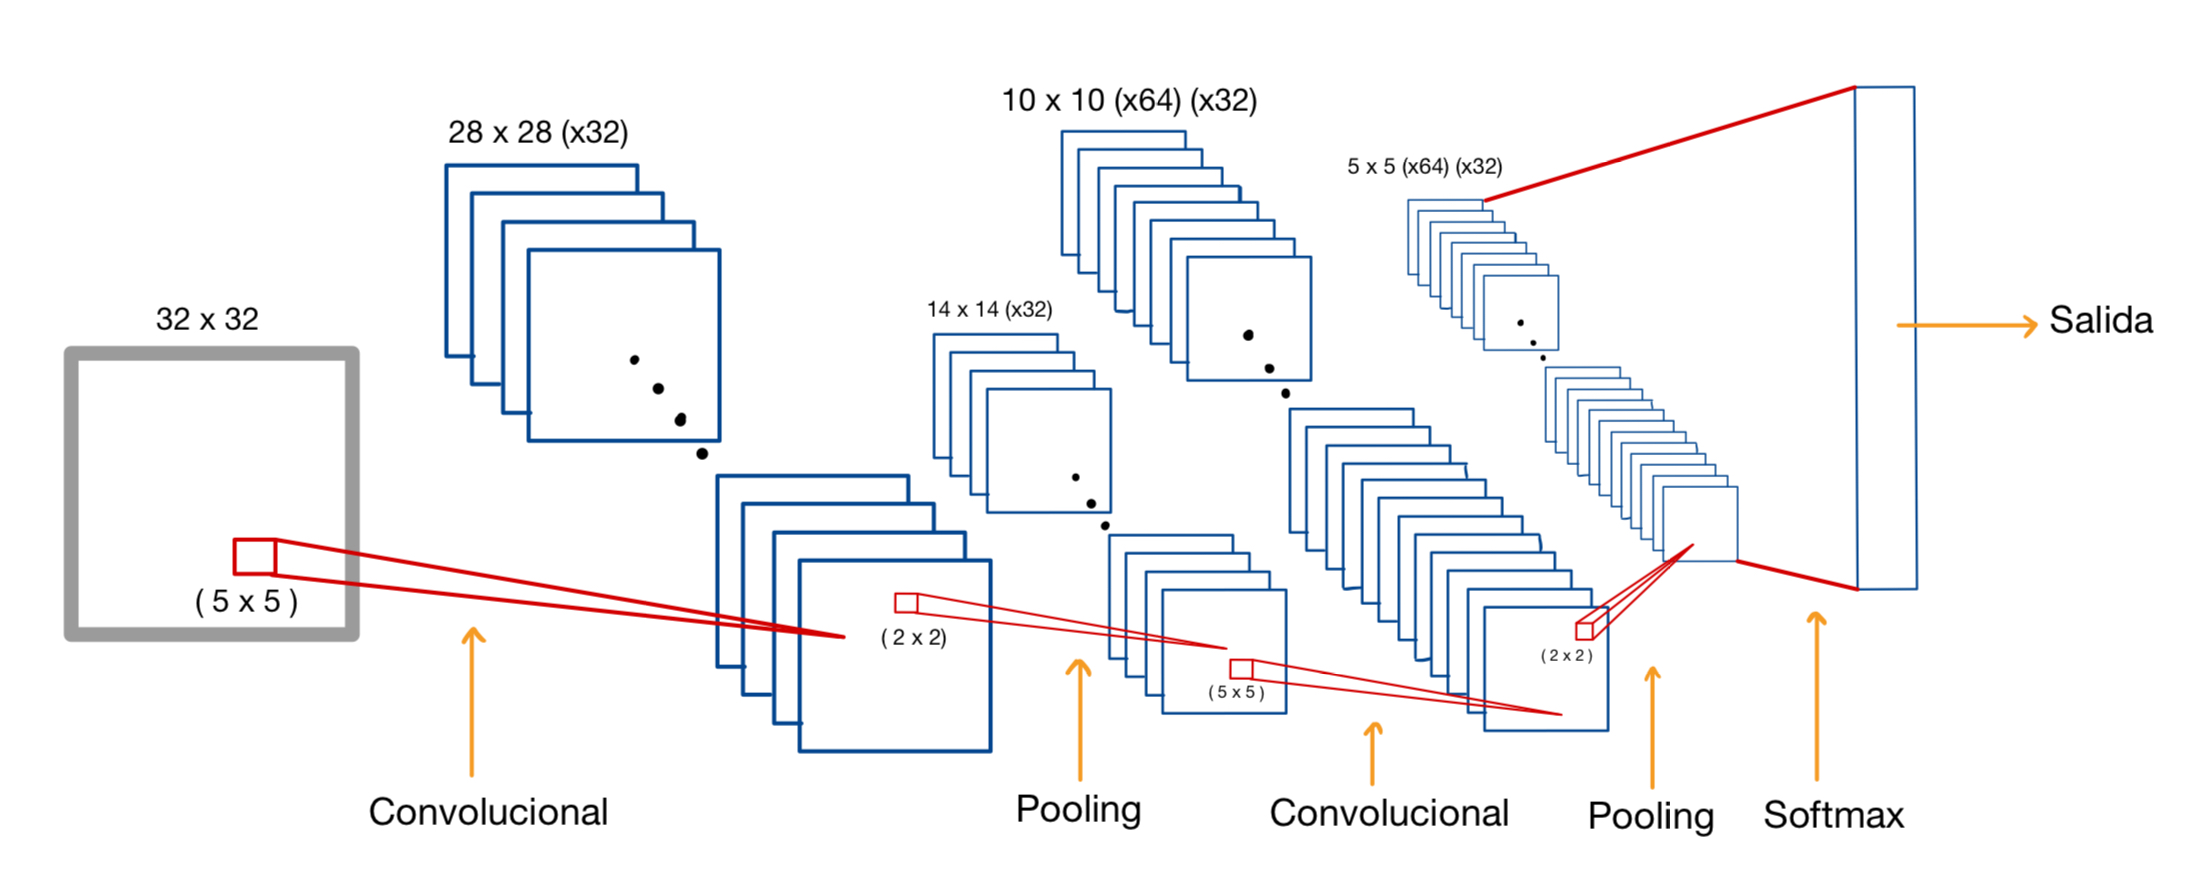

**COMPILACIÓN DE LA RED**

Se compila ahora la red de neuronas, dentro del compilador se especifica que **optimizador** se utilizará. El optimizador se utilizará para ajustar los pesos de la red durante el proceso de entrenamiento. El optimizador es un algoritmo que se encarga de minimizar la función de pérdida (loss function) al ajustar los pesos. Se utiliza Rmsprop, una variante del SGD pero este optimizador ajusta la tasa de aprendizaje de cada parámetro.

Después se asigna la **funcion de pérdida** que se utilizará para calcular la diferencia entre las predicciones del modelo y las etiquetas reales.En este caso, se utiliza 'categorical_crossentropy'. Al calcular la pérdida o la precisión, la red obtiene una medida cuantitativa de su rendimiento en los datos de entrenamiento.

Por último, se especifica la métrica o métricas que se deben evaluar y mostrar durante el entrenamiento y la evaluación del modelo, que como previamente fue comentado, es la precisión.

In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

**ENTRENAMIENTO**

In [27]:
history = model.fit(
    partial_train_images_train,
    partial_train_label_train,
    epochs=10,
    batch_size=64,
    validation_data=(train_images_val, train_label_val)
)

Epoch 1/10
625/625 [==============================] - 13s 8ms/step - loss: 3.8604 - acc: 0.1254 - val_loss: 3.4625 - val_acc: 0.1952
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 3.2320 - acc: 0.2325 - val_loss: 3.0747 - val_acc: 0.2704
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 2.9139 - acc: 0.2983 - val_loss: 3.0471 - val_acc: 0.2788
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 2.6989 - acc: 0.3379 - val_loss: 2.7833 - val_acc: 0.3354
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 2.5356 - acc: 0.3728 - val_loss: 2.7821 - val_acc: 0.3250
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 2.3941 - acc: 0.4031 - val_loss: 2.7121 - val_acc: 0.3487
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 2.2743 - acc: 0.4298 - val_loss: 2.6869 - val_acc: 0.3643
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 2

**GRÁFICAS**


[3.860353469848633, 3.231992244720459, 2.9139137268066406, 2.698878049850464, 2.53558611869812, 2.394137382507324, 2.274296283721924, 2.1673996448516846, 2.0762414932250977, 1.9894793033599854]
[0.12542499601840973, 0.2325499951839447, 0.2983250021934509, 0.337924987077713, 0.37279999256134033, 0.4030500054359436, 0.4298250079154968, 0.45352500677108765, 0.47244998812675476, 0.4933750033378601]
[3.462451934814453, 3.0747134685516357, 3.0470821857452393, 2.7832915782928467, 2.782069206237793, 2.7121353149414062, 2.686923027038574, 2.7117562294006348, 2.6818552017211914, 2.678367853164673]
[0.19519999623298645, 0.2703999876976013, 0.27880001068115234, 0.3353999853134155, 0.32499998807907104, 0.34869998693466187, 0.364300012588501, 0.36399999260902405, 0.36489999294281006, 0.3686999976634979]


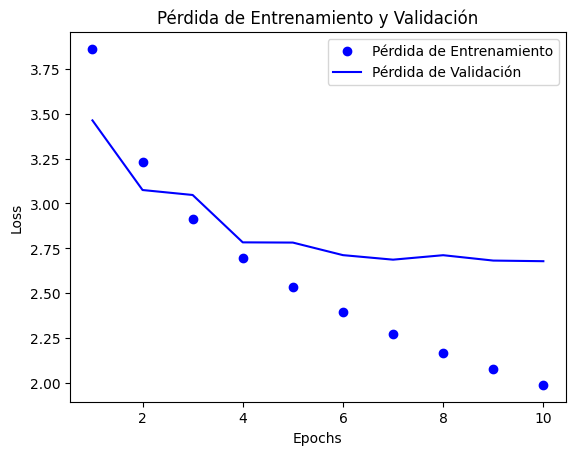

In [28]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

A partir de este gráfico, observamos cómo el modelo comienza a sobreajustarse desde la cuarta época, y este fenómeno de sobreajuste aumenta a medida que avanzan las épocas. Debido a esta tendencia, resulta necesario desarrollar otro modelo más adecuado para los datos que se están procesando.

**EVALUACIÓN**

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Precisión del conjunto de test con etiquetas finas: {test_acc}')

Accuracy on test set with fine labels: 0.3580000102519989


**MODELO MEJORADO**

 Ahora se aplica aumentación de datos al conjunto de imágenes utilizando la clase ImageDataGenerator de la biblioteca Keras. La aumentación de datos es una técnica que implica aplicar transformaciones variadas y aleatorias a las imágenes de entrada con el propósito de ampliar y diversificar el conjunto de entrenamiento, mejorando así la capacidad del modelo para generalizar a datos no vistos.

La configuración específica de aumentación de datos se realiza a través de los siguientes parámetros:

**rotation_range:** Define el rango de ángulos en grados para rotar aleatoriamente las imágenes. En este caso, se hace una rotación de hasta 15 grados.

**width_shift_range y height_shift_range:** Establecen los rangos para realizar desplazamientos horizontales y verticales aleatorios en las imágenes. Se permite un desplazamiento máximo del 20% del ancho y alto de la imagen, respectivamente.

**horizontal_flip:** Habilita el volteo horizontal aleatorio de las imágenes.


Una vez configurado el generador, se utiliza el método fit con el conjunto de imágenes de entrenamiento (train_images) para aplicar la configuración y preparar el generador para aplicar estas transformaciones durante el entrenamiento del modelo. La idea es introducir variabilidad en los datos de entrenamiento para mejorar la capacidad del modelo para adaptarse a diversas condiciones y mejorar su capacidad de generalización.

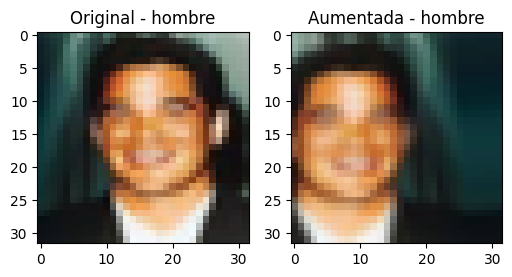

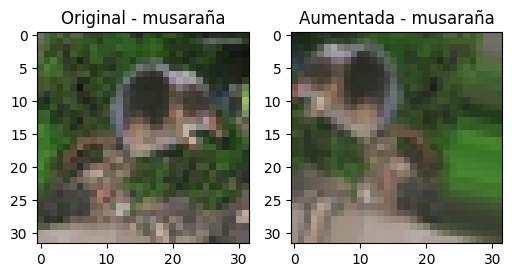

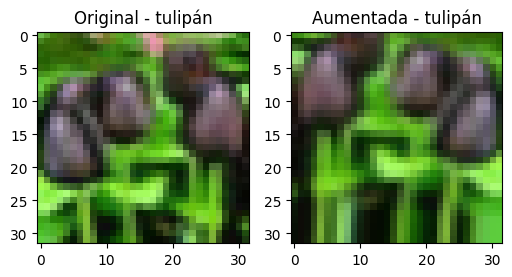

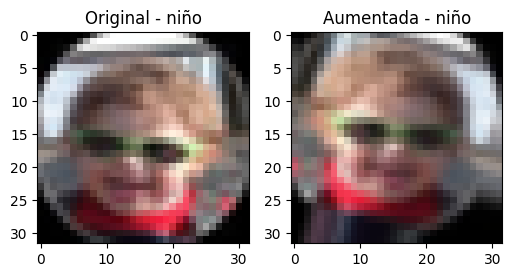

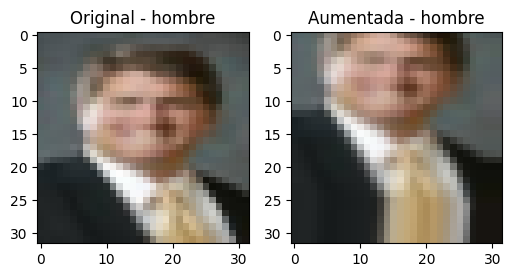

In [30]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

datagen.fit(train_images)

for index in random_indices:
    sample_image = train_images[index]

    # Visualizar la imagen original
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)

    flabel = train_labels[index]
    true_label = fine_labels[flabel.argmax()]

    plt.title(f'Original - {true_label}')

    # Obtener la imagen aumentada
    augmented_image = datagen.random_transform(sample_image)

    # Visualizar la imagen aumentada
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image)
    plt.title(f'Aumentada - {true_label}')

    plt.show()

**MODELO REGULARIZADO Y AJUSTE DE HIPERPARÁMETROS**

Tras realizar múltiples ajustes en el modelo mediante la experimentación con diversas arquitecturas, la incorporación de regularizaciones y la exploración de distintos conjuntos de hiperparámetros, se logra obtener la siguiente configuración del modelo.

Primero al añadir la primera capa convolucional se eligen los siguientes hiperparámetros:

- *128 filtros con una ventana deslizante de 3x3.* La elección de 128 filtros se debe a la necesidad de capturar una variedad de patrones en las imágenes, mientras que la ventana de 3x3 se elige para capturar detalles más finos. La combinación de un número significativo de filtros y una ventana más pequeña permite a la capa convolucional aprender características complejas y patrones locales en las imágenes.

- *Función de activación ELU (Exponential Linear Unit):* La característica principal de la función ELU es que, a diferencia de ReLU (Rectified Linear Unit), permite valores negativos para entradas, evitando así el problema de neuronas muertas y ayudando en la convergencia del entrenamiento.

- *Padding = 'same':* El parámetro 'same' para el relleno (padding) se utiliza con el propósito de obtener un tensor de salida con las mismas dimensiones que la entrada. Al especificar 'same', se añaden filas y columnas de ceros según sea necesario para que la salida conserve la dimensión de la entrada. Esta estrategia evita la pérdida de características cruciales al reducir el tamaño y preserva la información en los bordes. Al mantener la dimensión original, se evita un enfoque excesivo en detalles, contribuyendo así a prevenir el sobreajuste del modelo.

- *Stride = 1:* Como no se indica, el modelo toma por defecto el valor de stride = 1, el cual indica el numero de pasos en los que se mueve la ventana de los filtros.

- *kernel_regularizer=l2 (0.0001):* introduce un costo proporcional al cuadrado de los valores de los coeficientes de peso, comúnmente conocido como "Weight Decay". El propósito de esta penalización es minimizar la función de pérdida al ajustar el modelo a los datos, al mismo tiempo que mantiene los pesos pequeños para prevenir el sobreajuste.

Posteriormente se añade una capa de pooling que reducirá el tamaño de los mapas de características producidos en la capa convolucional a la mitad.

Se introduce una segunda capa convolucional con el mismo número de filtros que la capa anterior, con el objetivo de continuar aprendiendo detalles de las imágenes. Sin embargo, en este caso, no se aplica el regularizador L2 para acelerar el entrenamiento de la capa.
La siguiente capa de pooling vuelve a reducir los mapas de características a la mitad.

Se incorpora la tercera capa convolucional, que ahora consta de 512 filtros. La adición de esta capa se realiza con la intención de que pueda captar un conjunto más amplio y complejo de patrones presentes en las imágenes al tener mayor cantidad de filtros.

**Capa de Aplanamiento (Flatten):**

 Esta capa se utiliza para convertir el tensor tridimensional resultante de las capas convolucionales y de agrupación a un vector unidimensional. Este paso es necesario cuando se pasa de las capas convolucionales a las capas completamente conectadas.

**Primera Capa Densa (Dense):**

model.add(Dense(512, activation='elu')): Después de aplanar el tensor, se añade una capa densa con 512 neuronas y función de activación 'elu' (Exponential Linear Unit). Esta capa densa permite aprender representaciones más abstractas y complejas a medida que se conecta con las características extraídas por las capas convolucionales.

**Capa de Dropout:**

model.add(Dropout(0.5)): Se introduce una capa de dropout con una tasa del 0.5. El dropout desactiva aleatoriamente el 50% de las neuronas durante el entrenamiento, lo cual ayuda a prevenir el sobreajuste al introducir variabilidad y redundancia en la red.

**Segunda Capa Densa (Dense):**

model.add(Dense(32, activation='elu')): Otra capa densa se añade con 32 neuronas y función de activación 'elu'. Esta capa actúa como un regulador adicional y reduce la dimensionalidad de las representaciones aprendidas.

C**apa de Normalización por Lotes (BatchNormalization):**

model.add(BatchNormalization()): La normalización por lotes se aplica para normalizar las activaciones de la capa anterior. Esto ayuda a acelerar el entrenamiento y estabilizar la red al normalizar las entradas de cada capa.

**Capa de Salida (Dense):**

model.add(Dense(100, activation='softmax')): La última capa densa tiene 100 neuronas (correspondientes a las clases en CIFAR-100) y utiliza la función de activación 'softmax' para obtener probabilidades de pertenencia a cada clase.


In [31]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(512, kernel_size=(3, 3), activation='elu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='elu'))
model.add(BatchNormalization())

# Salida para la clase fina
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 512)         590336    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 512)        

**Output shape primera capa convolucional:**  (None, 32, 32, 128), 128 mapas de características, cada uno correpondiente a un filtro de tamaño 32 x 32 ya que se añadió el hiperparámetro padding para mantener el tamaño de la entrada.

**Parametros primera capa convolucional** (3584): 3 * 3 (Dimensión de la ventana de la capa) * 3 (canales de entrada) * 128 (filtros) + 128 (sesgo), se le añade un parametro bias por cada filtro aplicado.

**Output shape primera capa de pooling** (None, 16, 16, 128): Los 128 filtros de la capa convolucional se reducen a la mitad, miden ahora 16 * 16.  

Las capas de pooling no editan ningún **parámetro** ya que solo reducen el tamaño del mapa de características condensando la imágen, pero sin realizar cambios en los pesos.

**Output shape segunda capa convolucional:**  (None, 16, 16, 128), 128 mapas de características, cada uno correpondiente a un filtro de tamaño de 16 x 16.

Esta capa ajusta un total de 147,584 **parámetros**, calculados mediante la fórmula (3 * 3 * 128 + 1) * 128 = 147,584. Esto se desglosa en un tamaño de ventana de 3 x 3, con 128 filtros provenientes de la capa anterior, y se añade 1 para representar el sesgo de cada uno de los 128 nuevos filtros. La multiplicación por 128 se refiere al número de filtros en la capa actual, conectando cada filtro nuevo con los 128 filtros anteriores.

El **output shape** de la segunda capa de pooling son los 128 mapas reducidos a la mitad de tamaño, (None, 8, 8, 128). Con 0 parametros editables ya que solo reduce dimensión de mapas.


**Output shape tercera capa convolucional:**  (None, 8, 8, 512), 512 mapas de características, cada uno correpondiente a un filtro de tamaño de 8 x 8.

Esta capa ajusta un total de 590, 336  **parámetros**, calculados mediante la fórmula (3 * 3 * 128 + 1) * 512 = 590,336. Esto se desglosa en un tamaño de ventana de 3 x 3, con 128 filtros provenientes de la capa anterior, y se añade 1 para representar el sesgo de cada uno de los 512 nuevos filtros. La multiplicación por 512 se refiere al número de filtros en la capa actual, conectando cada filtro nuevo con los 128 filtros anteriores.

El **output shape** de la tercera capa de pooling son los 512 mapas reducidos a la mitad de tamaño, (None, 4, 4, 512) . Con 0 parametros editables ya que solo reduce dimensión de mapas.

**En la capa de flatten de output shape es** (None, 8192) porque al aplanar la capa convierte el tensor tridimensional en un solo vector de 1 dimensión. 8192 =  8 * 8 (tamaño mapas de características) * 128 (número de mapas). Esta capa solo aplana por lo que no tiene parametros editables.

**La forma de la salida de la primera capa densa es** (None, 512): La capa densa produce una salida que tiene 512 valores en cada lote, pero el tamaño del lote en el resumen no está fijo y puede variar según cómo se configure durante el entrenamiento.

**Los parámetros que se entrena**n son (4194816): 8192 (pixeles), entrada de la capa * 512 (número de neuronas de la capa) + 512 (cada neurona tiene un sesgo que se entrena).

**La forma de la salida de la segunda capa densa** es (None, 32): La capa densa produce una salida que tiene 32 valores en cada lote. Los parámetros que se entrenan son (16416): 512 (neuronas capa anterior) * 32 (número de neuronas de la capa) + 32 (cada neurona tiene un sesgo que se entrena).


**La capa de salida tiene la siguiente forma **(None, 100), 100 valores en cada lote, la cual edita 3300 **parámetros**. 32 (neuronas capa anterior) * 100 (número de neuronas de la capa) + 100 (cada neurona tiene un sesgo que se entrena).
           


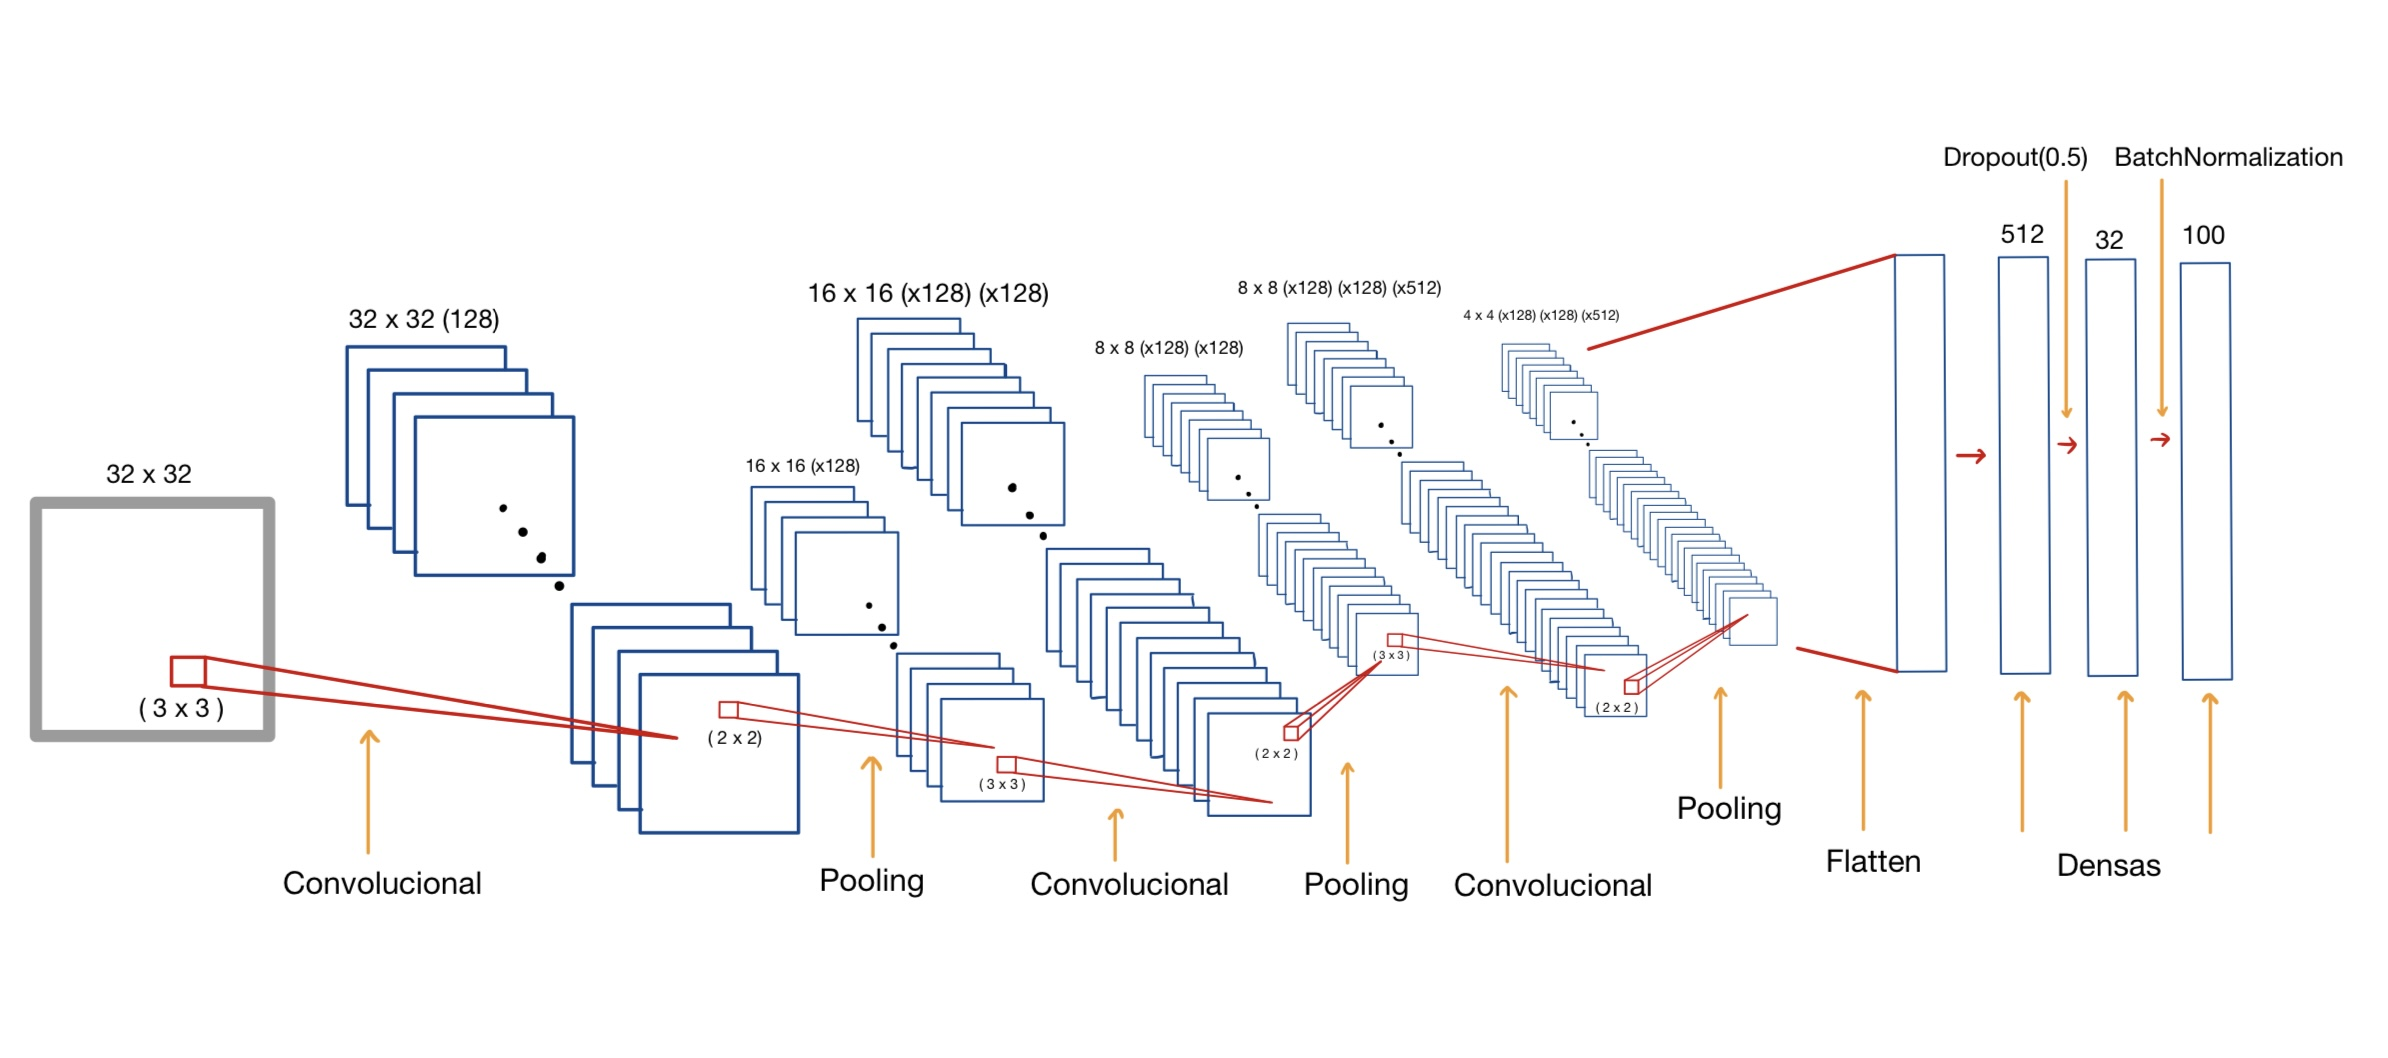

**ENTRENAMIENTO DEL MODELO**

El modelo se entrena a lo largo de 100 épocas utilizando un tamaño de lote (batch size) de 256 en el conjunto de entrenamiento. Durante este proceso, se monitorea la pérdida y precisión en el conjunto de validación. Esta evaluación en el conjunto de validación se utiliza para determinar el número óptimo de épocas antes de considerar que el modelo ha alcanzado su entrenamiento definitivo.

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(datagen.flow(partial_train_images_train,partial_train_label_train),
    epochs=100,
    batch_size=256,
    validation_data=(train_images_val, train_label_val),
    verbose=1)

Epoch 1/100
1250/1250 [==============================] - 38s 27ms/step - loss: 4.3738 - acc: 0.0382 - val_loss: 3.9883 - val_acc: 0.0803
Epoch 2/100
1250/1250 [==============================] - 42s 34ms/step - loss: 3.8890 - acc: 0.1025 - val_loss: 3.5569 - val_acc: 0.1572
Epoch 3/100
1250/1250 [==============================] - 48s 38ms/step - loss: 3.5921 - acc: 0.1515 - val_loss: 3.2670 - val_acc: 0.2142
Epoch 4/100
1250/1250 [==============================] - 34s 27ms/step - loss: 3.3821 - acc: 0.1874 - val_loss: 2.9698 - val_acc: 0.2668
Epoch 5/100
1250/1250 [==============================] - 36s 29ms/step - loss: 3.2312 - acc: 0.2171 - val_loss: 2.8858 - val_acc: 0.2764
Epoch 6/100
1250/1250 [==============================] - 41s 33ms/step - loss: 3.0950 - acc: 0.2396 - val_loss: 2.6921 - val_acc: 0.3169
Epoch 7/100
1250/1250 [==============================] - 33s 26ms/step - loss: 2.9757 - acc: 0.2639 - val_loss: 2.5878 - val_acc: 0.3453
Epoch 8/100
1250/1250 [==================

**Gráficas pérdida y precisión**

[4.373844623565674, 3.888974189758301, 3.592057704925537, 3.382138729095459, 3.2312262058258057, 3.0949864387512207, 2.9756622314453125, 2.8725168704986572, 2.795952796936035, 2.7327277660369873, 2.669044256210327, 2.608154773712158, 2.5540943145751953, 2.516350746154785, 2.4719438552856445, 2.429100275039673, 2.3958494663238525, 2.3740878105163574, 2.3317925930023193, 2.3015003204345703, 2.2713942527770996, 2.2538485527038574, 2.2327206134796143, 2.2004077434539795, 2.17939829826355, 2.150437831878662, 2.1340150833129883, 2.1055235862731934, 2.091573715209961, 2.0885491371154785, 2.0669586658477783, 2.045274496078491, 2.028653621673584, 2.017117977142334, 2.007266044616699, 2.0002574920654297, 1.9722741842269897, 1.9598941802978516, 1.9499906301498413, 1.9351011514663696, 1.9189023971557617, 1.9073398113250732, 1.9026671648025513, 1.8947023153305054, 1.8748365640640259, 1.8734571933746338, 1.8453680276870728, 1.843919277191162, 1.846137523651123, 1.819289207458496, 1.8208917379379272,

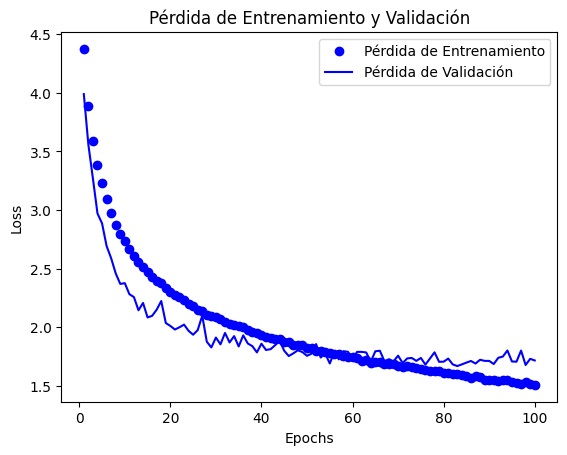

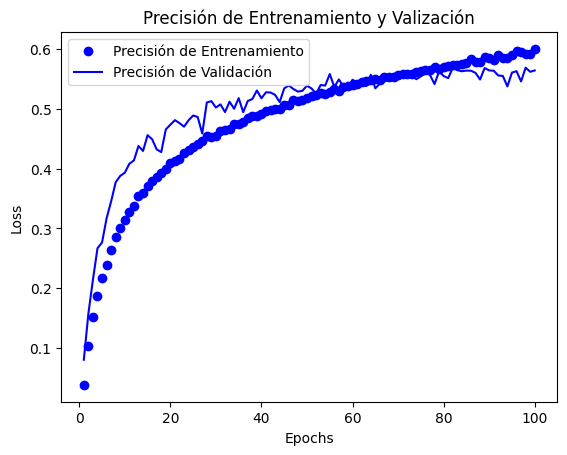

In [33]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

A partir de ambas visualizaciones gráficas, se observa un aumento constante en la precisión de entrenamiento a lo largo de las épocas. Sin embargo, al llegar al final de la gráfica, se nota una divergencia entre las líneas de entrenamiento y validación, indicando un fenómeno de sobreentrenamiento. En este contexto, se toma la decisión de seleccionar la época 69, que representa el punto donde la precisión alcanza su punto máximo sin incurrir en sobreentrenamiento, como la elección óptima para evitar una modelización excesiva.



**EVALUACIÓN**

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nLa pérdida de la red sobre los datos de entrenamiento:', test_loss)
print('La exactitud de la red sobre los datos de entrenamiento.:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7343 - acc: 0.5611

La pérdida de la red sobre los datos de entrenamiento: 1.7342746257781982
La exactitud de la red sobre los datos de entrenamiento.: 0.5611000061035156


**Modelo**

In [35]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3),padding='same', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(512, kernel_size=(3, 3), activation='elu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='elu'))
model.add(BatchNormalization())

# Salida para la clase fina
model.add(Dense(100, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(datagen.flow(train_images,train_labels),
    epochs=69,
    batch_size=256,
    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 512)         590336    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 512)        

**Evalución del modelo**

Se calcula la pérdida y precisión del modelo evaluando los datos de prueba. `test_loss` que es el calculo de la pérdida, hará refencia a cómo de bien/mal se ajusta el modelo a las `test_images`, mientras que `test_acc` a la precisión, exactitud y proporción de predicciones correctas realizadas por el modelo en los datos de prueba.

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nLa pérdida de la red sobre los datos de entrenamiento:', test_loss)
print('La exactitud de la red sobre los datos de entrenamiento:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.6973 - acc: 0.5611

La pérdida de la red sobre los datos de entrenamiento: 1.6972812414169312
La exactitud de la red sobre los datos de entrenamiento.: 0.5611000061035156


Vemos que se obtiene un 56% de precisión con los datos de test, comparando con el 55% de entranamiento vemos que el modelo no sufre de sobreentrenamiento, lo que significa que el modeo logra generalizar bien a partir de los datos de entrenamiento.

**PREDICCIONES**

Se realiza ahora la predicción de clases para el modelo entrenado en imágenes de CIFAR100, utilizando un diccionario denominado diccionario_animales que organiza las etiquetas gruesas de las imágenes con sus 5 etiquetas finas correspondientes.

 Se iteran las primeras 10 imágenes del conjunto de prueba, mostrando información detallada sobre las predicciones, como la predicción de la clase, la clase real, la superclase real y la superclase predicha, además de visualizar la imagen junto con la confianza del modelo en cada clase.

 Se utilizan funciones como plot_image y plot_value_array para facilitar la visualización.

 Además, se define una función llamada encontrar_vector que busca la superclase a la que pertenece una clase dicha.


313/313 [==============================] - 1s 2ms/step
Superclase predicha incorrectamente. 

Superclase predicción:grandes cosas al aire libre hechas por el hombre
Superclase real: grandes escenas naturales al aire libre


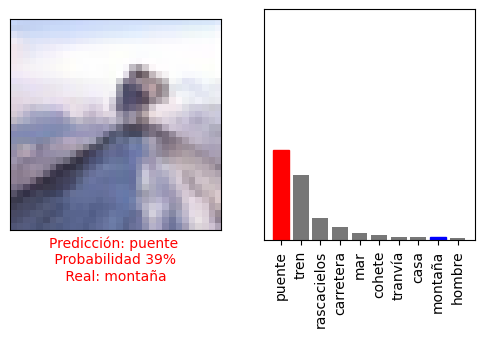

Superclase predicha correctamente: grandes escenas naturales al aire libre 



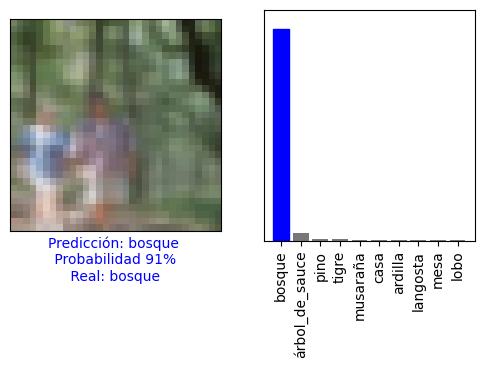

Superclase predicha correctamente: mamíferos 



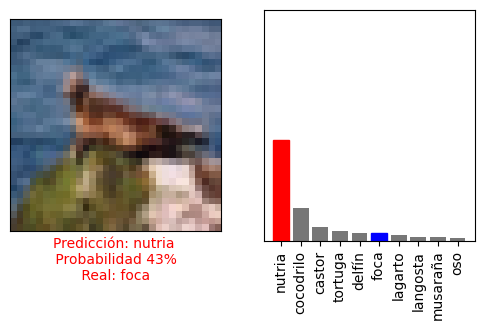

Superclase predicha incorrectamente. 

Superclase predicción:aparatos electricos del hogar
Superclase real: frutas y vegetales


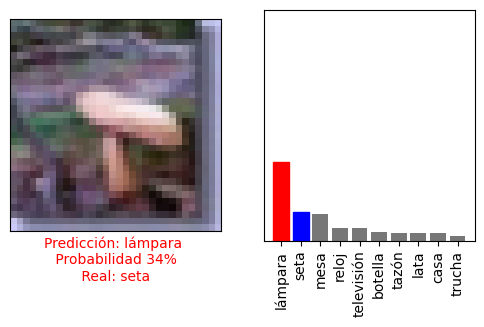

Superclase predicha correctamente: grandes escenas naturales al aire libre 



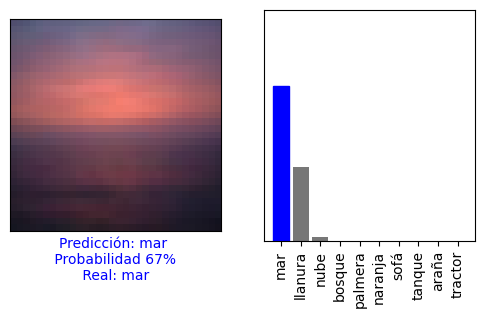

Superclase predicha incorrectamente. 

Superclase predicción:insectos
Superclase real: None


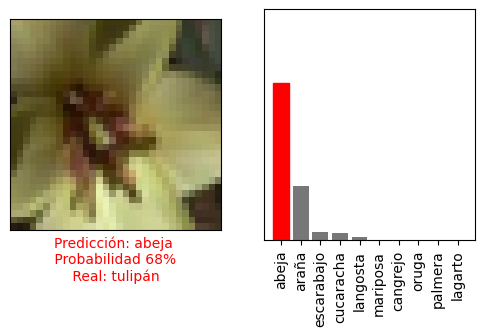

Superclase predicha incorrectamente. 

Superclase predicción:vehículos 2
Superclase real: grandes omnívoros y herbívoros


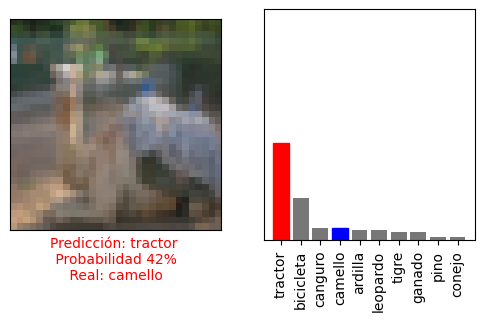

Superclase predicha incorrectamente. 

Superclase predicción:pequeños mamíferos
Superclase real: insectos


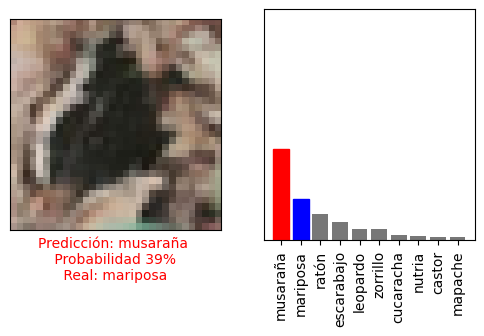

Superclase predicha correctamente: grandes escenas naturales al aire libre 



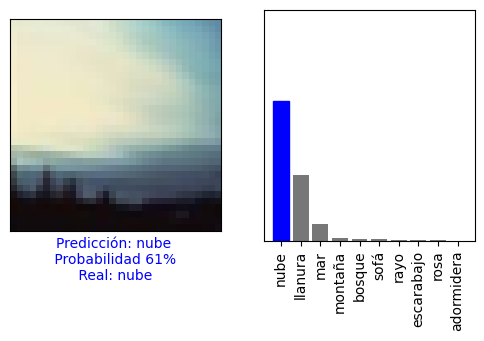

Superclase predicha correctamente: frutas y vegetales 



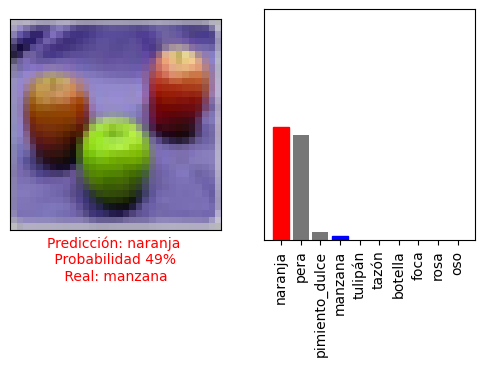

In [59]:
diccionario_animales = {
    'mamíferos': ['castor', 'delfín', 'nutria', 'foca', 'ballena'],
    'pez': ['pez_de_acuario de acuario', 'pez_plano', 'rayas', 'tiburón', 'truchas'],
    'flores': ['orquídeas', 'amapolas', 'rosas', 'girasoles', 'tulipanes'],
    'Contenedores de comida': ['botella', 'tazón', 'lata', 'taza', 'plato'],
    'frutas y vegetales': ['manzana', 'seta', 'naranja', 'pera', 'pimiento_dulce'],
    'aparatos electricos del hogar': ['reloj', 'teclado', 'lámpara', 'teléfono', 'televisión'],
    'muebles para el hogar': ['cama', 'silla', 'sofá', 'mesa', 'armario'],
    'insectos': ['abeja', 'escarabajo', 'mariposa', 'oruga', 'cucaracha'],
    'grandes carnívoros': ['oso', 'leopardo', 'león', 'tigre', 'lobo'],
    'grandes cosas al aire libre hechas por el hombre': ['puente', 'castillo', 'casa', 'camino', 'rascacielos'],
    'grandes escenas naturales al aire libre': ['nube', 'bosque', 'montaña', 'llanura', 'mar'],
    'grandes omnívoros y herbívoros': ['camello', 'ganado', 'chimpancé', 'elefante', 'canguro'],
    'mamíferos de tamaño mediano': ['zorro', 'puercoespín', 'zarigüeya', 'mapache', 'zorrillo'],
    'invertebrados no insectos': ['cangrejo', 'langosta', 'caracol', 'araña', 'gusano'],
    'gente': ['bebé', 'niño', 'niña', 'hombre', 'mujer'],
    'reptiles': ['cocodrilo', 'dinosaurio', 'lagarto', 'serpiente', 'tortuga'],
    'pequeños mamíferos': ['hámster', 'ratón', 'conejo', 'musaraña', 'ardilla'],
    'árboles': ['árbol_de_arce', 'roble', 'palma', 'pino', 'arbol_de_sauce'],
    'vehículos 1': ['bicicleta', 'autobús', 'motocicleta', 'camioneta', 'tren'],
    'vehículos 2': ['cortacésped', 'cohete', 'tranvía', 'tanque', 'tractor']
}

num_classes = len(fine_labels)

predictions = model.predict(test_images)

# Iterar sobre varias imágenes para mostrar las predicciones
for j in range(10):
    pred = predictions[j]
    indice = np.argmax(pred)

  #La función np.argmaxse utiliza para encontrar el valor del array más grande,
  #esto nos sirve para saber qué clase le ha asignado el modelo a la imagen.

    suma = np.sum(pred)
    clase = fine_labels[indice]

def plot_image(m, predictions_array, true_label, img):
    predictions_array, tl, img = predictions_array[m], true_label[m], img[m]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    tl = np.argmax(tl)

    if predicted_label == tl:
        color = 'blue'
    else:
        color = 'red'

    def encontrar_vector(palabra):
      for clave, valor in diccionario_animales.items():
         if palabra in valor:
             return clave

    plt.xlabel("Predicción: {} \n Probabilidad {:2.0f}% \n Real: {} \n".format(fine_labels[predicted_label],
                                              100 * np.max(predictions_array),
                                              fine_labels[tl]),
                   color=color)

    if encontrar_vector(fine_labels[predicted_label]) == encontrar_vector(fine_labels[tl]):
      print("Superclase predicha correctamente: {} \n".format(encontrar_vector(fine_labels[tl])))
    else:
      print("Superclase predicha incorrectamente. \n")
      print("Superclase predicción:{}\nSuperclase real: {}".format(encontrar_vector(fine_labels[predicted_label]), encontrar_vector(fine_labels[tl])))


def plot_value_array(m, prediction_array, true_label):
    prediction_array, true_label = prediction_array[m], true_label[m]

    true_label = np.argmax(true_label)

    plt.grid(False)

    top_indices = np.argsort(prediction_array)[-10:][::-1]
    class_labels = [fine_labels[idx] for idx in top_indices]
    plt.xticks(range(10), class_labels, rotation='vertical')  # Ajusta el rango y las etiquetas

    plt.yticks([])

    thisplot = plt.bar(range(10), prediction_array[top_indices], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[0].set_color('red')

    # Ajusta para manejar el caso donde la clase verdadera no está en top_indices
    true_class_indices = np.where(top_indices == true_label)[0]
    if len(true_class_indices) > 0:
        true_class_index = true_class_indices[0]
        thisplot[true_class_index].set_color('blue')

for h in range(0, 10):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(h, predictions, test_labels, test_images)
    plt.subplot(1, 2, 2)
    plot_value_array(h, predictions, test_labels)
    plt.show()

**MATRIZ DE CONFUSIÓN**

Una matriz de confusión funciona comparando las predicciones del modelo con las clases reales de un conjunto de datos. La matriz organiza la información en forma de una tabla donde las filas representan las clases reales y las columnas representan las clases predichas por el modelo.



313/313 [==============================] - 1s 4ms/step


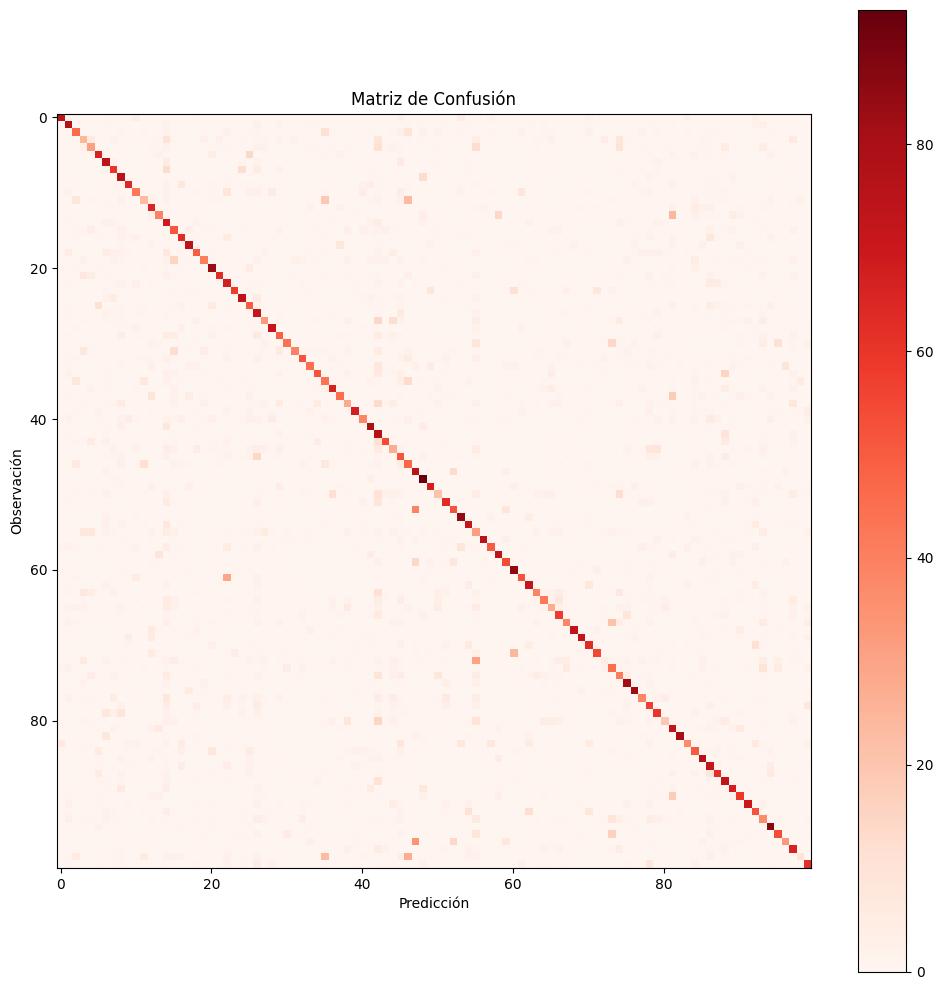

In [38]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

# Obtener las clases reales del conjunto de prueba
yt_true_classes = np.argmax(test_labels, axis=1)

# Obtener las predicciones del modelo en el conjunto de prueba
Y_pred = model.predict(test_images)

# Convertir las clases predichas a etiquetas únicas
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Crear la matriz de confusión
confusion_mtx = confusion_matrix(yt_true_classes, Y_pred_classes)

# Plotear la matriz de confusión
plt.figure(figsize=(10, 10))
plot_confusion_matrix(confusion_mtx, classes=range(100), title='Matriz de Confusión')

plt.show()

Al examinar la matriz de confusión, se evidencia que la mayoría de las imágenes son clasificadas correctamente, ya que los valores más altos se encuentran en la diagonal principal. Las celdas fuera de esta diagonal indican los errores de clasificación, resaltando las instancias en las que el modelo ha fallado al asignar la etiqueta correcta.

**CONCLUSIONES**

En resumen, esta práctica ha sido interesante en cuanto a la comprensión profunda de cómo funcionan las Redes de Neuronas Convolucionales (CNN) en la clasificación de imágenes. La selección cuidadosa de hiperparámetros y la arquitectura específica del modelo no son simplemente elecciones arbitrarias, sino decisiones estratégicas que tienen un impacto significativo en el rendimiento y la generalización del sistema.

La elección de 128 filtros en la primera capa convolucional con una ventana deslizante de 3x3 no es aleatoria; busca capturar una variedad de patrones en las imágenes, mientras que la ventana más pequeña se centra en detalles más finos. La función de activación ELU se prefiere sobre ReLU para evitar el problema de neuronas muertas y facilitar la convergencia del entrenamiento.

La adición de regularización L2 con un valor de 0.0001, el uso de padding tipo 'same' para conservar dimensiones y el stride de 1 para controlar el desplazamiento, todas estas elecciones están destinadas a optimizar el rendimiento y prevenir el sobreajuste. La reducción del tamaño de los mapas de características mediante capas de pooling, el aumento de la complejidad con capas convolucionales adicionales y la introducción de capas densas para representaciones más abstractas son decisiones estratégicas basadas en el tipo de problema al que nos enfrentábamos.

La implementación de técnicas como la aumentación de datos, la cual permite al modelo adaptarse a diversas condiciones y mejorar la generalización, demuestra la comprensión de la importancia de un conjunto de entrenamiento diverso. Siempre es esencial considerar detenidamente los datos con los que se está trabajando y presentarlos al programa de manera óptima para facilitar su aprendizaje. Este proceso puede incluir pasos como la normalización, rotación, eliminación de colores, entre otros, con el fin de proporcionar al modelo una representación variada de los datos de entrenamiento.

En resumen, existen numerosos hiperparámetros y ajustes de datos que se pueden explorar para optimizar un modelo y mejorar su precisión. La toma de decisiones en este proceso implica experimentación y prueba de diversas configuraciones, ya que no hay una "fórmula" predeterminada para determinar qué funciona mejor para un conjunto de datos específico sin realizar pruebas y evaluaciones detalladas. La personalización y adaptación del modelo son esenciales, y la iteración a través de diferentes combinaciones de hiperparámetros es clave para lograr un rendimiento óptimo en tareas de aprendizaje automático.

**TRABAJO EN EQUIPO**


El proyecto se ha llevado a cabo de manera colaborativa, con la participación activa de todos los miembros del equipo. El proceso se inició con la comprensión de los fundamentos de las redes neuronales convolucionales, los hiperparámetros y las regularizaciones posibles. Una vez que se estableció un entendimiento común, procedimos a un desarrollo exhaustivo del trabajo.

Durante este proceso, realizamos ajustes en el modelo para observar cómo afectaban a la precisión. Aunque cada miembro realizaba ajustes de manera individual, compartíamos hallazgos y explicábamos las razones detrás de mejoras específicas cuando se identificaban. Se han enfrentado diversos desafíos durante la práctica, como la limitación de recursos GPU para el entrenamiento del modelo y el tiempo prolongado de ejecución, lo que dificultaba la iteración rápida en la experimentación de cambios.

Además, se implementó el aumento de datos mediante la técnica de data aumentation, una estrategia que ha demostrado ser efectiva para mejorar la generalización del modelo al introducir variaciones en los datos de entrenamiento. Asimismo, se experimentó con otras mejoras, como la reducción de capas densas, encontrando obstáculos y soluciones a lo largo del proceso.

En cuanto a la redacción de la memoria, esta fue realizada de manera colaborativa. Inicialmente, se elaboró un primer borrador abordando los aspectos fundamentales, y posteriormente, el  resto del equipo revisó y amplió la memoria, incorporando otros aspectos relevantes a medida que se identificaban.
